<a href="https://colab.research.google.com/github/Vikash2009/play-store-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/playstoredata/Play Store Data (1).csv')

In [ ]:
# lets see 1st two rows to get a gough idea
df.head(6)

NameError: ignored

In [ ]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   object 
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   object 
 4   Reviews         9659 non-null   object 
 5   Size            314 non-null    float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


Rating is the only numerical column and have some null values.


**Checking outliers in Rating column through boxplot :**

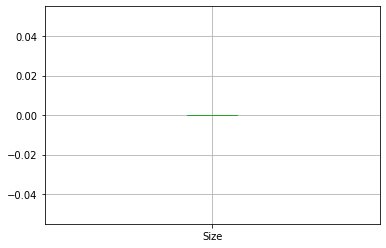

In [ ]:
# checking outliers
df.boxplot();

there is an outlier

**Retrieving and deleting the outlier row:**

In [ ]:
# checking which outlier?
df[df.Rating>5]

TypeError: ignored

In [ ]:
# Dropping the outlier
df.drop([10472],inplace=True)

In [ ]:
# rechecking if its dropped or not?
df[10470:10474]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Outlier have been dropped

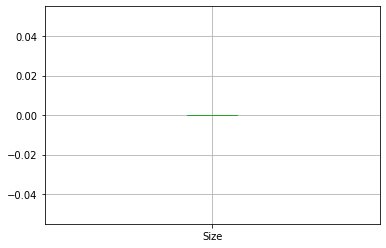

In [ ]:
# checking boxplot again
df.boxplot();

Now, no app have a rating > 5.

**Removing columns which are 90% empty:**

In [ ]:
# remving colum using threshold
df.dropna(thresh=len(df)*0.1,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Filling numerical null values with Median:**







**Filling categorial(non numeric column) with Mode:**

In [ ]:
df['Rating'].fillna(value=df.Rating.median(),inplace=True)
df['Type'].fillna(value=df.Type.mode()[0],inplace=True)
df['Current Ver'].fillna(value=df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(value=df['Android Ver'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Finally, we have zero null values.

**Finding and dropping duplicate values :**

In [ ]:
# checking duplicate values
df.duplicated().sum()

483

In [ ]:
# Lets see the dupicated values
df.loc[df.duplicated()==True].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [ ]:
# dropping dupliacte rows
df.drop_duplicates(inplace=True)

In [ ]:
# checking affected number of rows
df.shape

(10357, 13)

dupilcate columns have been removed

In [ ]:
# checking the number of unique columns
df.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [ ]:
# checking the rows in which name of the apps are repeating
df['App'].value_counts().loc[lambda x : x>1].index

Index(['ROBLOX', '8 Ball Pool', 'Bubble Shooter', 'Helix Jump',
       'Zombie Catchers', 'slither.io', 'Angry Birds Classic',
       'Farm Heroes Saga', 'Candy Crush Saga', 'Subway Surfers',
       ...
       'Agar.io', 'CallApp: Caller ID, Blocker & Phone Call Recorder',
       'Truecaller: Caller ID, SMS spam blocking & Dialer',
       'Cheapflights – Flight Search', 'Whoscall - Caller ID & Block',
       'British Airways', 'American Airlines', 'The Emirates App',
       'DU Browser—Browse fast & fun', 'Web Browser for Android'],
      dtype='object', length=523)

523 apps are there with repeated names

In [ ]:
# showing rows with same app name('ROBLOX')
df.loc[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


all these rows belongs to the same app 'ROBLOX' with little differences in Reviews

In [ ]:
# sorting the Dataset with the Reviews column in descending order because we gonna drop duplicate rows with lesser reviews
df=df.sort_values(by='Reviews',ascending=False)
# dropping duplicates of other columns with lesser reviews
df=df.drop_duplicates(subset=['App'])

TypeError: ignored

In [ ]:
# resetting index
df=df.reset_index()

In [ ]:
# checking total unique values in 'Price' column
df['Price'].unique()

array(['0', '0M', '2.49', '2.99', '0.99', '3.99', '4.99', '399.99',
       '1.99', '79.99', '7.49', '4.49', '9.99', '5.99', '13.99', '4.29',
       '1.70', '14.99', '12.99', '1.49', '19.99', '1.50', '3.49', '1.29',
       '7.99', '29.99', '1.59', '3.02', '39.99', '89.99', '6.99', '2.90',
       '1.00', '19.40', '8.99', '1.75', '5.00', '3.08', '18.99', '299.99',
       '17.99', '379.99', '8.49', '2.56', '15.46', '1.97', '24.99',
       '2.60', '19.90', '1.26', '4.80', '4.77', '400.00', '16.99',
       '10.99', '389.99', '33.99', '46.99', '1.76', '11.99', '2.00',
       '10.00', '14.00', '6.49', '3.28', '1.20', '2.59', '4.84', '37.99',
       '1.61', '5.49', '4.60', '9.00', '15.99', '74.99', '3.88', '4.85',
       '3.04', '28.99', '1.96', '1.04', '154.99', '200.00', '30.99',
       '394.99', '3.61', '25.99', '109.99'], dtype=object)

In [ ]:
# removing '$' sign and assigining it to float datatype
df['Price']=df['Price'].str.strip('$')

In [ ]:
# typecasting price column
df['Price']=df['Price'].astype('float64')

In [ ]:
# typecasting Reviews column
df['Reviews']=df['Reviews'].astype('int64')

In [ ]:
# checking total unique values in size column
df['Size'].unique()

array([nan,  0.])

Sizes varies in 3 categories:
1. Kb(k)
2. Mb(M)
3.varies with device


In [ ]:
# creating list of index of rows having size in kb
df_kb_list=df.loc[df['Size'].str.endswith('k')].index
df_kb_list

ValueError: ignored

In [ ]:
for index in df_kb_list:
  df.at[index,'Size']=str(np.round(float(str(df.loc[index]['Size']).replace("k",""))/1000,3))+"M"

In [ ]:
# replacing values 'varies with device' to 0
df.loc[df['Size']=='Varies with device','Size']=str(0)+"M"

In [ ]:
# removing suffix 'M'
df['Size']=df['Size'].str.rstrip("M")

In [ ]:
# typecasting the column'Size'
df['Size']=df['Size'].astype("float64")

In [ ]:
df['Installs'].unique()

array(['1000000', '100000', '500000', '0', '50000', '5000000', '10000000',
       '10000', '50000000', '100000000', '5000', '1000', '500', '100',
       '50', '10', '1000000000', '500000000', '5', '1'], dtype=object)

having inappropiate data as '0M'

In [ ]:
# removing '+' sign
df['Installs']=df['Installs'].str.rstrip('+')

In [ ]:
df['Installs']=df['Installs'].str.rstrip('M')

In [ ]:
# removing ',' from installs
df['Installs']=df['Installs'].str.replace(",","")

In [ ]:
# df['Installs']=df['Installs'].astype("int64")

In [ ]:
df['Installs'].unique()

array(['1000000', '100000', '500000', '0', '50000', '5000000', '10000000',
       '10000', '50000000', '100000000', '5000', '1000', '500', '100',
       '50', '10', '1000000000', '500000000', '5', '1'], dtype=object)

In [ ]:
df.loc[df['Installs']=='0']

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
8,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
12,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
15,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
33,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9597,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
9602,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
9606,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
9642,0M,0M,0M,0M,0M,NaN,0,0M,0M,0M,0M,0M,0M,0M
